In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/mushrooms.csv")
df.shape

(8124, 23)

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


In [6]:
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

df.head().T

,0,1,2,3,4
class,1,0,0,1,0
cap-shape,5,5,0,5,5
cap-surface,2,2,2,3,2
cap-color,4,9,8,8,3
bruises,1,1,1,1,0
odor,6,0,3,6,5
gill-attachment,1,1,1,1,1
gill-spacing,0,0,0,0,1
gill-size,1,0,0,1,0
gill-color,4,4,5,5,4


In [7]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5686, 22) (5686,) (2438, 22) (2438,)


In [9]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=0, gamma='auto')
svm_model.fit(X_train,y_train)
y_pred_svc = svm_model.predict(X_test)
cm_svc = confusion_matrix(y_test,y_pred_svc)
print(cm_svc)

accuracy_svc = accuracy_score(y_test,y_pred_svc)
print('The accuracy of SVM is : ', str(accuracy_svc*100) , '%')

[[1263    0]
 [   0 1175]]
The accuracy of SVM is :  100.0 %


In [10]:
sv_train_score=svm_model.score(X_train, y_train)
sv_test_score=svm_model.score(X_test, y_test)
print('The accuracy of the svm classifier on training data is {:.2f} '.format(sv_train_score))
print('The accuracy of the svm classifier on test data is {:.2f}'.format(sv_test_score))

The accuracy of the svm classifier on training data is 1.00 
The accuracy of the svm classifier on test data is 1.00


In [11]:
y_pred = svm_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1263    0]
 [   0 1175]]
1.0


In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

   micro avg       1.00      1.00      1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



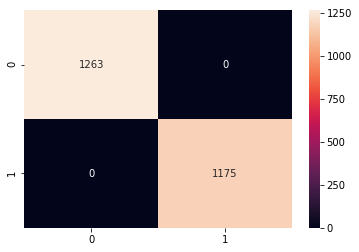

In [14]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")